breinbaas | revisie 3 | 15-12-2020 

# Opdrachten - Classes en overerving

In dit notebook gaan we aan de slag met de Python classes en overerving. Probeer de vragen zoveel mogelijk zelf te beantwoorden maar kom je er echt niet uit vraag dan een mede cursist of de leraar of bekijk het antwoord op dit notebook.

### 1 classes

We willen GEF bestanden inlezen via een class. Maak hiervoor een class met de volgende eigenschappen;

![gefreader](img/gefreader.png)

Toelichting op de eigenschappen;
* z is een lijst van floats die de diepte van de meting aangeeft (de eerste kolom in het sample.gef bestand)
* qc is een lijst van floats die de conusweestand aangeeft (tweede kolom in het sample.gef bestand)
* fs is een lijst van floats die de plaatselijke wrijving aangeeft (derde kolom in het sample.gef bestand)

Toelichting op de functies;
* read_from_file is een functie die een bestandsnaam meekrijgt en de lijst met z, qc en fs uit het bestand leest, gebruik sample.gef om je code te testen
* print_stats is een functie die voor zowel qc als fs het minimum en maximum weergeeft

Mocht je moeite hebben met de uitwerking omdat je nog niet zo bekend ben met classes kijk dan bv eens naar;

https://www.w3schools.com/python/python_classes.asp

In [3]:
class GEFReader:
    def __init__(self):
        self.z = []
        self.qc = []
        self.fs = []
        
    def read_from_file(self, filename):
        lines = open(filename, 'r').readlines()
        for line in lines[1:]:
            args = [float(s.strip()) for s in line.split(';')]
            self.z.append(args[0])
            self.qc.append(args[1])
            self.fs.append(args[2])
    
    def print_stats(self):
        print(f"Qc;max = {max(self.qc)}")
        print(f"Qc;min = {min(self.qc)}")
        print(f"Fs;max = {max(self.fs)}")
        print(f"Fs;min = {min(self.fs)}")

In [4]:
g = GEFReader()
g.read_from_file('data/sample.gef')
g.print_stats()

Qc;max = 48.4
Qc;min = 0.02
Fs;max = 0.4667
Fs;min = 0.0002


### 2 overerving

Nu we een GEFReader hebben gemaakt kunnen we een class maken die erft van de GEFReader en een plot functie toevoegt. We gaan deze class de GEFPlotter noemen. De structuur ziet er als volgt uit;

![gefplotter](img/gefplotter.png)

Zoals je ziet is de GEFPlotter class gebaseerd op de GEFReader class maar wordt er een extra functie (plot) aan toegevoegd. Deze functie moet met matplotlib een plotje maken van de qc en de fs tegen de diepte z.

Let op; 
* je hoeft niks te veranderen aan de GEFReader class

Ben je nog onzeker over het onderdeel overerving kijk dan bv eens op;

https://www.w3schools.com/python/python_inheritance.asp

In [5]:
import matplotlib.pyplot as plt

class GEFPlotter(GEFReader):
    def plot(self):
        plt.plot(self.qc, self.z)
        plt.plot(self.fs, self.z)

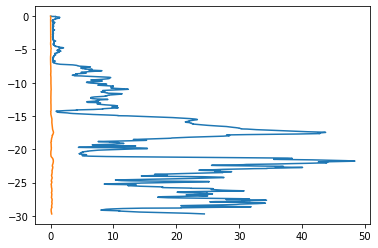

In [6]:
gp = GEFPlotter()
gp.read_from_file('data/sample.gef')
gp.plot()

### 3 te snel klaar?

Een echt GEF bestand is wat lastiger dan wat je hier gebruikt hebt. Ondanks het feit dat GEF voor uniformering moest zorgen worden er nog steeds veel manieren gevonden om niet zo netjes met GEFs om te gaan. In de data folder vind je een voorbeeld van een compleet gef bestand (fullsample.gef).

Pas de code in GEFReader aan om dit bestand netjes in te lezen en gebruik je tijd om wat extra infomatie in de GEFPlotter weer te geven (door bijvoorbeeld de naam en x,y coordinaten te plotten of door qc en fs apart te plotten). 

In [10]:
class GEFReaderAdvanced:
    def __init__(self):
        self.z = []
        self.qc = []
        self.fs = []
        self.x = 0. # plek voor de x coordinaat
        self.y = 0. # plek voor de y coordinaat 
        self.ztop = 0. # plek voor het maaiveld van de sondering
        self.projectid = "" # plek voor de project naam
        
    def read_from_file(self, filename):
        lines = open(filename, 'r').readlines()
        
        reading_header = True # we weten zeker dat een GEF met een header moet beginnen (# regels)
        for line in lines:             
            if reading_header: # lees een header line of een data line
                reading_header = self._read_header_line(line)
            else:
                self._read_data_line(line)               
            
    def _read_header_line(self, line):
        keyword, argline = line.split('=') # GEF header lines zijn gescheiden door een = teken
        keyword = keyword.strip() # weg met de spaties
        args = [s.strip() for s in argline.split(',')] # stop alle argumenten achter het = teken in een lijst 
        
        if keyword == '#EOH': return False # einde van de header, vanaf nu lezen we data
        elif keyword == '#XYID': 
            self.x = float(args[1])
            self.y = float(args[2]) 
        elif keyword == '#ZID':
            self.ztop = float(args[1])
        elif keyword == '#PROJECTID':
            self.projectid = args[0]
        
        return True # we zijn nog steeds bezig om de header te lezen     
    
    def _read_data_line(self, line):
        args = [float(s.strip()) for s in line.split(' ') if len(s.strip())>0] # splits op spaties maar verwijder lege waarden
        self.z.append(args[0])
        self.qc.append(args[1])
        self.fs.append(args[2])
    
    def print_stats(self):
        print(f"X      = {self.x}")
        print(f"Y      = {self.y}")
        print(f"Ztop   = {self.ztop}")       
        print(f"Qc;max = {max(self.qc)}")
        print(f"Qc;min = {min(self.qc)}")
        print(f"Fs;max = {max(self.fs)}")
        print(f"Fs;min = {min(self.fs)}")

In [11]:
ga = GEFReaderAdvanced()
ga.read_from_file('data/fullsample.gef')
ga.print_stats()

X      = 110885.0
Y      = 493345.0
Ztop   = 1.24
Qc;max = 48.4
Qc;min = 0.02
Fs;max = 0.4667
Fs;min = 0.0002


In [13]:
import matplotlib.gridspec as gridspec

class GEFPlotterAdvanced(GEFReaderAdvanced):
    def plot(self):
        title = f"{self.projectid} (x={self.x} y={self.y})" # maak de titel klaar        
        fig = plt.figure(figsize=(8,12)) # even een iets grotere grafiek maken
        fig.suptitle(title, fontsize='x-large') # plaats de titel bovenaan de (samengestelde) grafiek
        fig.subplots_adjust(top=0.92) # beetje ruimte voor de titel 
        gs = fig.add_gridspec(1, 3) # verdeel de grafiek, qc over 2/3 en fs over 1/3 van de breedte
        ax1 = fig.add_subplot(gs[0, :-1]) # eerste twee kolommen voor de qc 
        ax1.set_title('Qc')
        ax1.grid(True) # toon het grid
        ax1.plot(self.qc, self.z)
        ax2 = fig.add_subplot(gs[0, -1:]) # laatste kolom voor de fs
        ax2.set_title('Fs')
        ax2.grid(True)
        ax2.plot(self.fs, self.z)
        

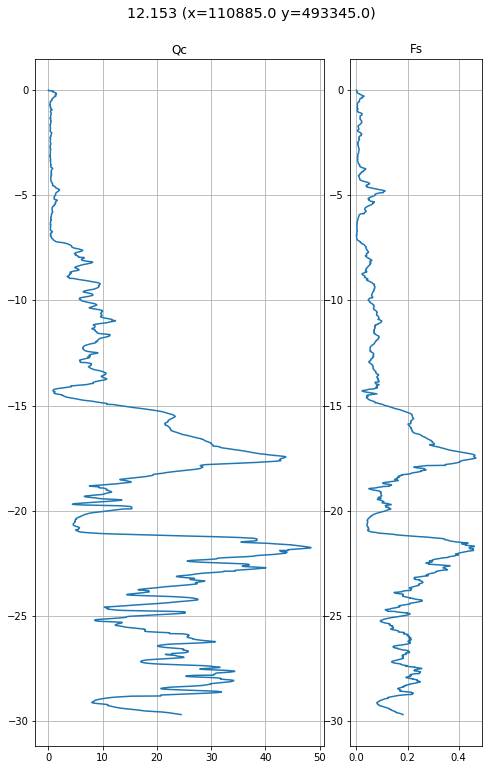

In [14]:
gpa = GEFPlotterAdvanced()
gpa.read_from_file('data/fullsample.gef')
gpa.plot()